# Bank marketing campaigns dataset | Opening Deposit

## About Dataset

Ini adalah kumpulan data yang menggambarkan hasil kampanye pemasaran bank di Portugal. Kampanye yang dilakukan sebagian besar berbasis panggilan telepon langsung, menawarkan kepada klien bank untuk menempatkan deposito berjangka. Jika setelah semua upaya pemasaran klien setuju untuk menempatkan deposito, variabel target ditandai dengan 'yes', jika tidak maka 'no'.

Sumber data:

[Link Dataset UCI](https://archive.ics.uci.edu/ml/datasets/bank+marketing)

## Business Understanding

Bank portugal mengalami penurunan pendapatan karena klien tidak melakukan deposito sesering sebelumnya, oleh karena itu:

### Problem Statement

- Identifikasi klien yang memiliki peluang lebih tinggi untuk berlangganan depostio berjangaka panjang agar bisa fokus upaya pemasaran pada klien tersebut

### Goals 

- agar Bank bisa fokus pada klien yang berdeposit berjangka panjang agar tidak mengalami pendapatan minim

### Solution Stamtements

- Mengetahui Data / Data Understanding
- Preparasi Data (Feature Engineering and Selection)
- Proses Explatory Analysis (Visualizations)
- Model the Data using Machine Learning
- Validate and implement data model
- Optimize and Strategize 



### Prepare for Data Understanding
Mengimport Library yang diperlukan


In [1]:
## Database Phase
import pandas as pd
import numpy as np

# Machine Learning Phase
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

#Metrics Phase
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#Visualization Phase
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
pd.set_option('display.max_columns', 500)
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

Memanggil data yang akan dijadikan bahan uji


In [2]:
bank=pd.read_csv("./Dataset/bank-additional-full.csv",sep=';')
bank_copy=bank.copy()

## print shape of dataset with rows and columns and information 
print ("The shape of the  data is (row, column):"+ str(bank_copy.shape))
print (bank_copy.info())

The shape of the  data is (row, column):(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 no

**Dataset:** 


Data ini mempunyai 4118 Instance dan 21 Features dengan tidak adanya no null Values. namun proses pengecekan data tetap dilaukan untuk melihat nilai data yang mencurigakan

**Attributes:**
**Bank client data:**

1. **Age** : Age of the lead (numeric)
2. **Job** : type of job (Categorical) 
3. **Marital** : Marital status (Categorical)
4. **Education** :  Educational Qualification of the lead (Categorical)
5. **Default:** Does the lead has any default(unpaid)credit (Categorical)
6. **Housing:** Does the lead has any housing loan? (Categorical) 
7. **loan:** Does the lead has any personal loan? (Categorical)

**Related with the last contact of the current campaign:**

8. **Contact:** Contact communication type (Categorical)
9. **Month:** last contact month of year (Categorical) 
10. **day_of_week:** last contact day of the week (categorical)
11. **duration:** last contact duration, in seconds (numeric). 


**Other attributes:**

12. **campaign:** number of contacts performed during this campaign and for this client (numeric)
13. **pdays:** number of days that passed by after the client was last contacted from a previous campaign(numeric; 999 means client was not previously contacted))
14. **previous:** number of contacts performed before this campaign and for this client (numeric)
15. **poutcome:** outcome of the previous marketing campaign (categorical)

**Social and economic context attributes**

16. **emp.var.rate:** employment variation rate - quarterly indicator (numeric)
17. **cons.price.idx:** consumer price index - monthly indicator (numeric)
18. **cons.conf.idx:** consumer confidence index - monthly indicator (numeric)
19. **euribor3m:** euribor 3 month rate - daily indicator (numeric)
20. **nr.employed:** number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

21. **y** - has the client subscribed a term deposit? (binary: 'yes','no')

mari melihat overview dataframe

In [3]:
bank_copy.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Melihat tipe data di setiap fitur

In [4]:
bank_copy.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Melihat statistikal parameter di setiap fitur seperti count, mean, dan sebagainya

In [5]:
#Checking out the statistical parameters
bank_copy.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Melihat jumlah clients berdasarkan kategorinya 

In [6]:
#Checking out the categories and their respective counts in each feature
print("Job:",bank_copy.job.value_counts(),sep = '\n')
print("-"*40)
print("Marital:",bank_copy.marital.value_counts(),sep = '\n')
print("-"*40)
print("Education:",bank_copy.education.value_counts(),sep = '\n')
print("-"*40)
print("Default:",bank_copy.default.value_counts(),sep = '\n')
print("-"*40)
print("Housing loan:",bank_copy.housing.value_counts(),sep = '\n')
print("-"*40)
print("Personal loan:",bank_copy.loan.value_counts(),sep = '\n')
print("-"*40)
print("Contact:",bank_copy.contact.value_counts(),sep = '\n')
print("-"*40)
print("Month:",bank_copy.month.value_counts(),sep = '\n')
print("-"*40)
print("Day:",bank_copy.day_of_week.value_counts(),sep = '\n')
print("-"*40)
print("Previous outcome:",bank_copy.poutcome.value_counts(),sep = '\n')
print("-"*40)
print("Outcome of this campaign:",bank_copy.y.value_counts(),sep = '\n')
print("-"*40)

Job:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
----------------------------------------
Marital:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
----------------------------------------
Education:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
----------------------------------------
Default:
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
----------------------------------------
Housing loan:
housing
yes        2157

Insights:

- terdapat Unknown Category di setiap fitur
- Campaign hanya beroperasi di hari kerja 


## Data Preparation

Mempersiapkan data agar bisa diolah

### Data Cleaning = Checking Null Values and Duplicating Data

melihat data yang missing dalam bentuk visualisasi

<Axes: >

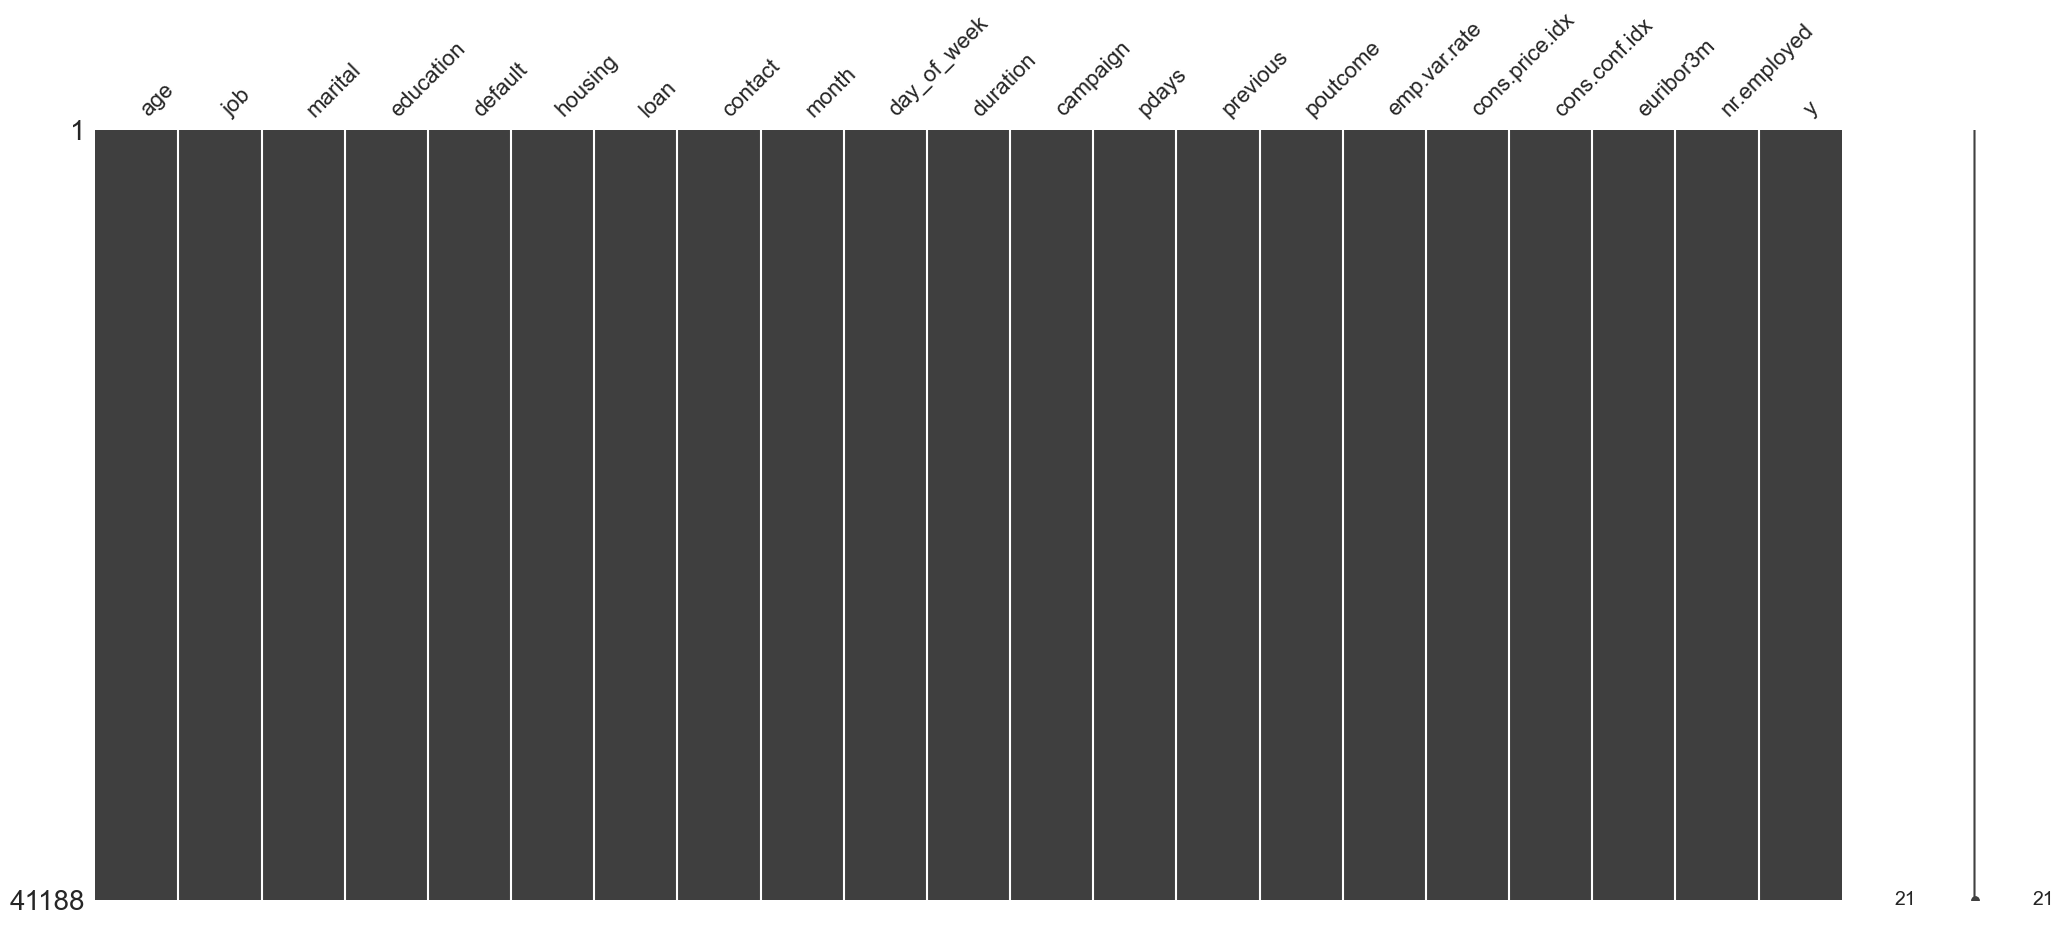

In [7]:
import missingno as msno 
msno.matrix(bank_copy)

melihat output print untuk mengecek nilai null

In [8]:
print('Data columns with null values:',bank_copy.isnull().sum(), sep = '\n')

Data columns with null values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


melihat duplikasi data

In [9]:
duplikasi = bank_copy.duplicated()

print(duplikasi)

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool


**Tidak Ada NULL VALUES dan DUPLICATING DATA**


### Data Visualization
Karena memiliki banyak data numerik, mari kita fokuskan plot pada model pembelajaran mesin. Selain itu, mari kita cari tahu fitur-fitur mana yang paling penting dan hilangkan yang paling tidak penting.

In [10]:
import plotly.express as px

fig = px.box(bank_copy, x="job", y="duration", color="y")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

**Wawasan:**
* Prospek yang tidak melakukan deposito memiliki durasi panggilan yang lebih pendek.
* Jika dibandingkan rata-ratanya, pekerja kasar dan pengusaha memiliki durasi panggilan yang tinggi, sedangkan pelajar dan pensiunan memiliki durasi panggilan rata-rata yang rendah.
* Sebagian besar prospek berasal dari klien wiraswasta dan orang-orang manajemen.

### Campaign vs Duration calls

In [11]:
fig = px.scatter(bank_copy, x="campaign", y="duration", color="y")
fig.show()

**Wawasan:**

* Semakin lama durasi panggilan, semakin tinggi probabilitas untuk melakukan deposito.
* Durasi panggilan menurun seiring dengan berjalannya waktu kampanye.
* Terdapat banyak prospek positif pada hari-hari awal kampanye.

### Campaign vs Month

<BarContainer object of 41188 artists>

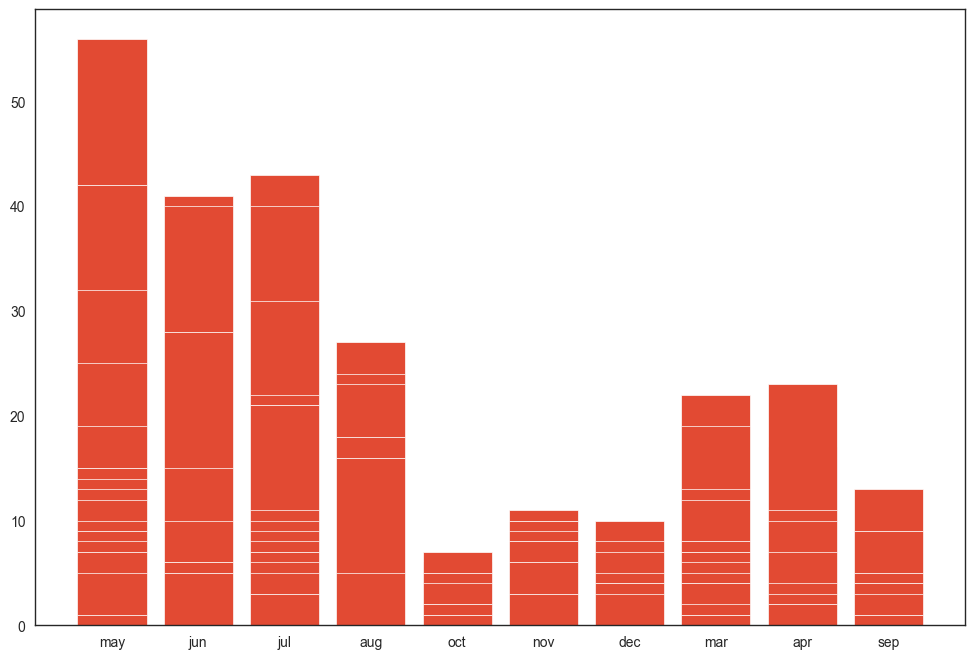

In [12]:
plt.bar(bank_copy['month'], bank_copy['campaign'])

**Wawasan:**

* Kampanye sebagian besar terkonsentrasi pada awal periode bank (Mei, Juni, dan Juli).
* Biasanya periode pendidikan dimulai pada waktu tersebut sehingga ada kemungkinan orang tua membuat deposito atas nama anak-anak mereka.
* Mereka juga melakukan kampanye di akhir periode bank.

### Distribution of Quarterly Indicators

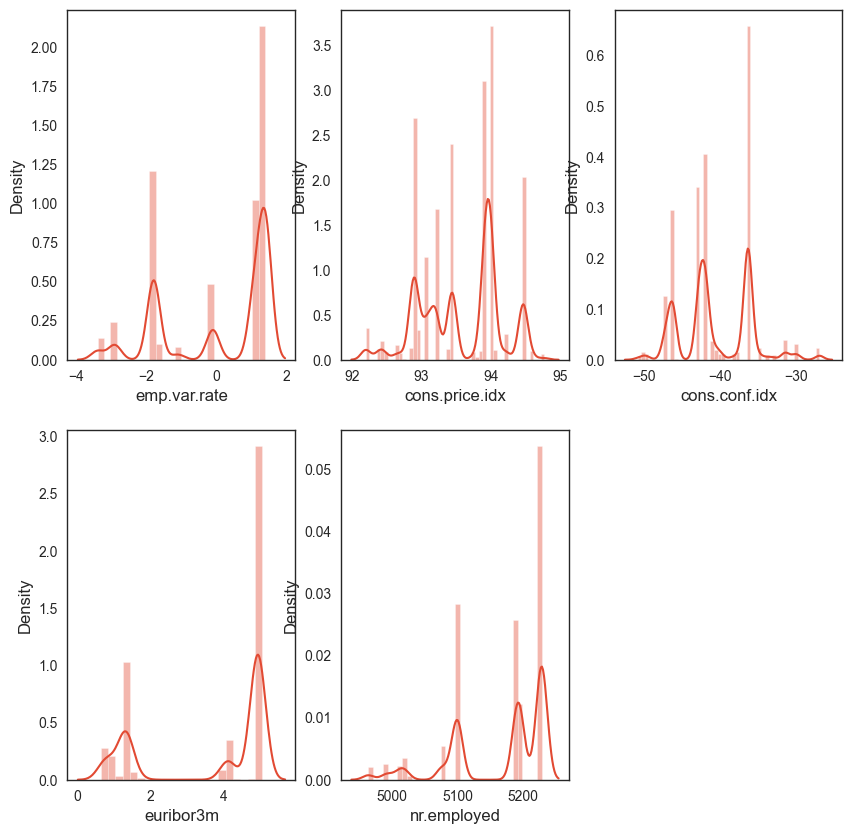

In [13]:
plt.subplot(231)
sns.distplot(bank_copy['emp.var.rate'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(bank_copy['cons.price.idx'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(bank_copy['cons.conf.idx'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(bank_copy['euribor3m'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(bank_copy['nr.employed'])
fig = plt.gcf()
fig.set_size_inches(10,10)

**Wawasan:**

* Terlihat adanya variasi karyawan yang tinggi yang menandakan bahwa kampanye dilakukan saat terjadi pergeseran pekerjaan yang tinggi akibat kondisi ekonomi.
* Indeks harga konsumen yang baik menunjukkan bahwa prospek memiliki daya beli yang baik untuk barang dan jasa, yang mungkin menjadi alasan untuk mendorong mereka melakukan deposito dan menanamkan ide menabung.
* Indeks kepercayaan konsumen cukup rendah karena mereka tidak memiliki banyak kepercayaan pada ekonomi yang berfluktuasi.
* Suku bunga Euribor 3 bulan adalah suku bunga di mana sejumlah bank Eropa meminjamkan dana dalam bentuk euro satu sama lain dengan jangka waktu 3 bulan. Dalam kasus kami, suku bunga pinjaman tinggi.
* Jumlah karyawan juga mencapai puncaknya, yang dapat meningkatkan indeks pendapatan mereka. Hal ini mungkin menjadi alasan kampanye menargetkan prospek yang bekerja untuk melakukan deposito.

### Marital Status vs Price index

<Axes: xlabel='cons.price.idx', ylabel='marital'>

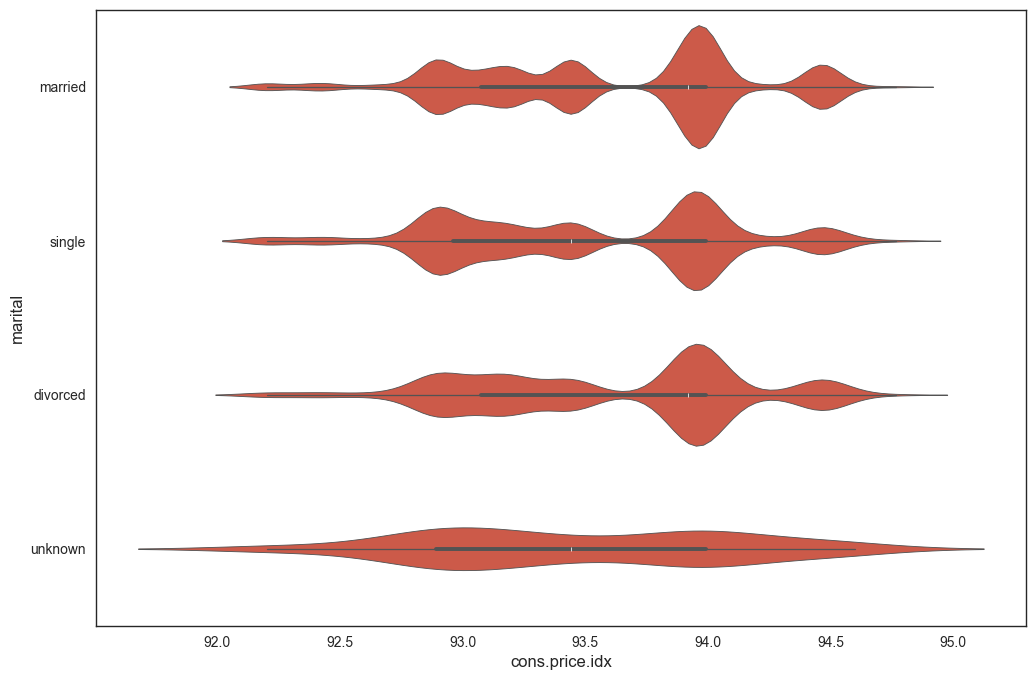

In [14]:
sns.violinplot( y=bank_copy["marital"], x=bank_copy["cons.price.idx"] )

**Wawasan:**

* Terdapat perbedaan yang sangat kecil di antara indeks harga.
* Prospek yang sudah menikah memiliki keunggulan yang signifikan karena mereka memiliki indeks yang berkontribusi sebagai pasangan.

### Positive deposits vs attributes

<Axes: xlabel='education'>

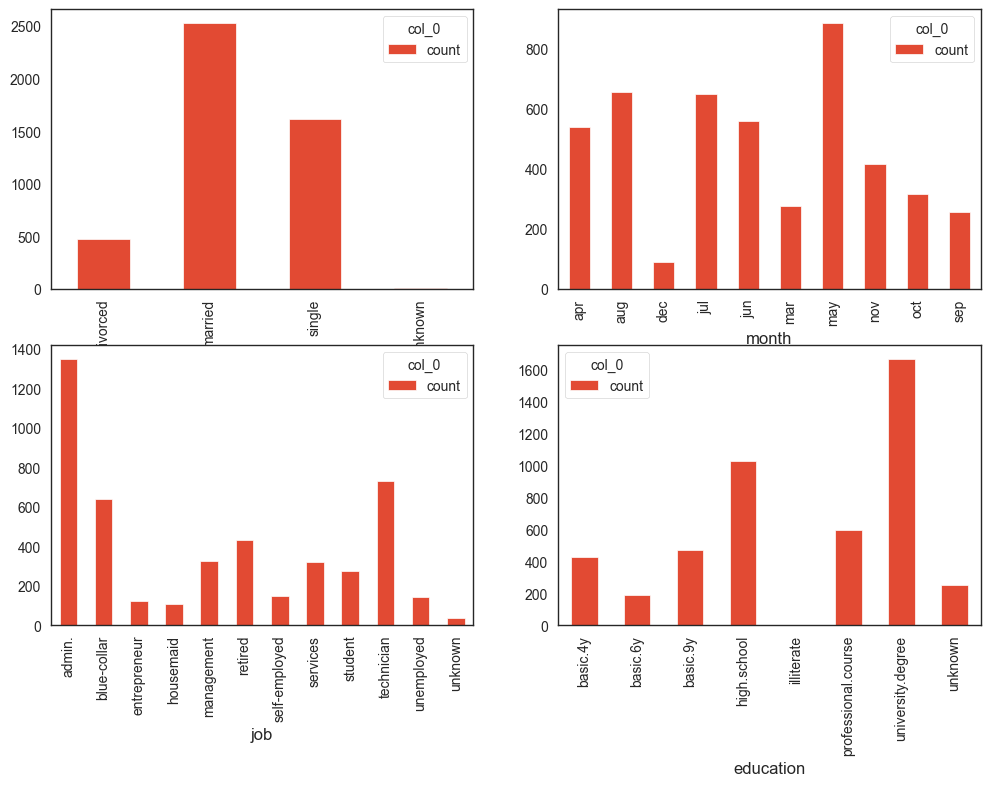

In [15]:
bank_yes = bank_copy[bank_copy['y']=='yes']


df1 = pd.crosstab(index = bank_yes["marital"],columns="count")    
df2 = pd.crosstab(index = bank_yes["month"],columns="count")  
df3= pd.crosstab(index = bank_yes["job"],columns="count") 
df4=pd.crosstab(index = bank_yes["education"],columns="count")

fig, axes = plt.subplots(nrows=2, ncols=2)
df1.plot.bar(ax=axes[0,0])
df2.plot.bar(ax=axes[0,1])
df3.plot.bar(ax=axes[1,0])
df4.plot.bar(ax=axes[1,1])       

**Wawasan:**

* Prospek yang sudah menikah membuat deposito tinggi diikuti oleh yang lajang.
* Banyak deposito dilakukan pada bulan Mei karena itu adalah awal periode bank.
* Prospek yang bekerja di posisi administrasi membuat deposito, diikuti oleh teknisi dan pekerja kasar.
* Prospek yang memiliki setidaknya gelar universitas membuat deposito diikuti oleh lulusan sekolah menengah.

### Correlation plot of attributes


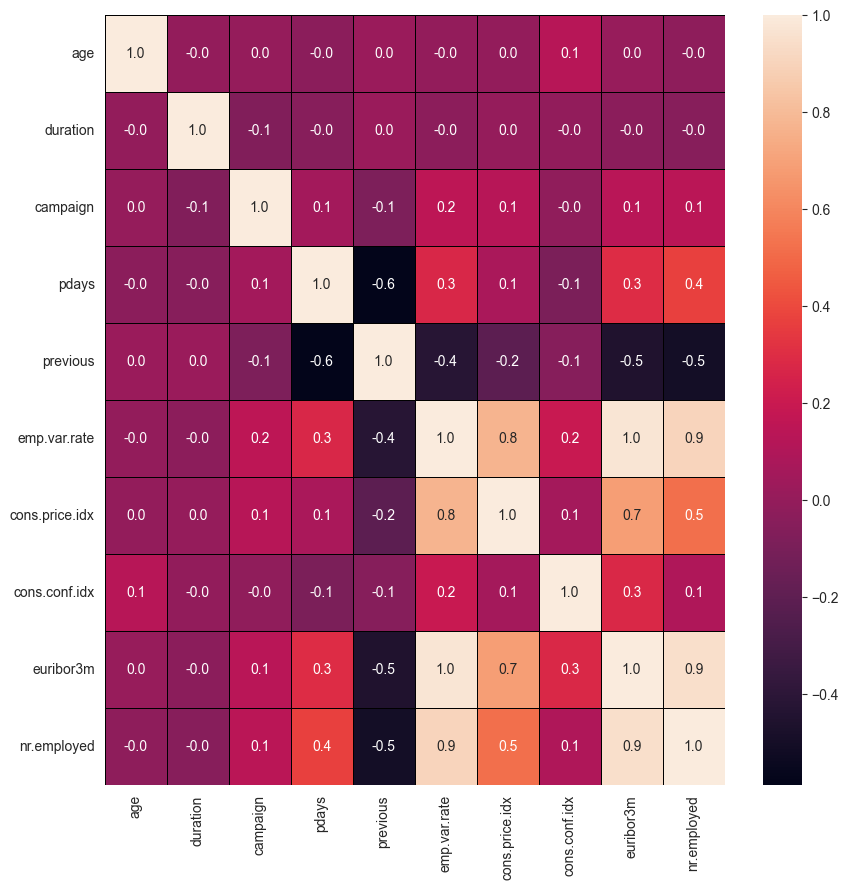

In [16]:
# Memilih hanya kolom numerik
numeric_cols = bank_copy.select_dtypes(include=[float, int])

# Membuat heatmap
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(numeric_cols.corr(), annot=True, linewidths=0.5, linecolor="black", fmt=".1f", ax=ax)
plt.show()

**Wawasan:**

* Indikator-indikator memiliki korelasi di antara mereka.
* Tingkat jumlah karyawan sangat berkorelasi dengan tingkat variasi karyawan.
* Indeks harga konsumen sangat berkorelasi dengan suku bunga bank (semakin tinggi indeks harga, semakin tinggi suku bunga).
* Tingkat variasi karyawan juga berkorelasi dengan suku bunga bank.



### Handling Outlier
melihat numerical feature outliers menggunakan boxplot

Text(0.5, 1.0, 'No of employees')

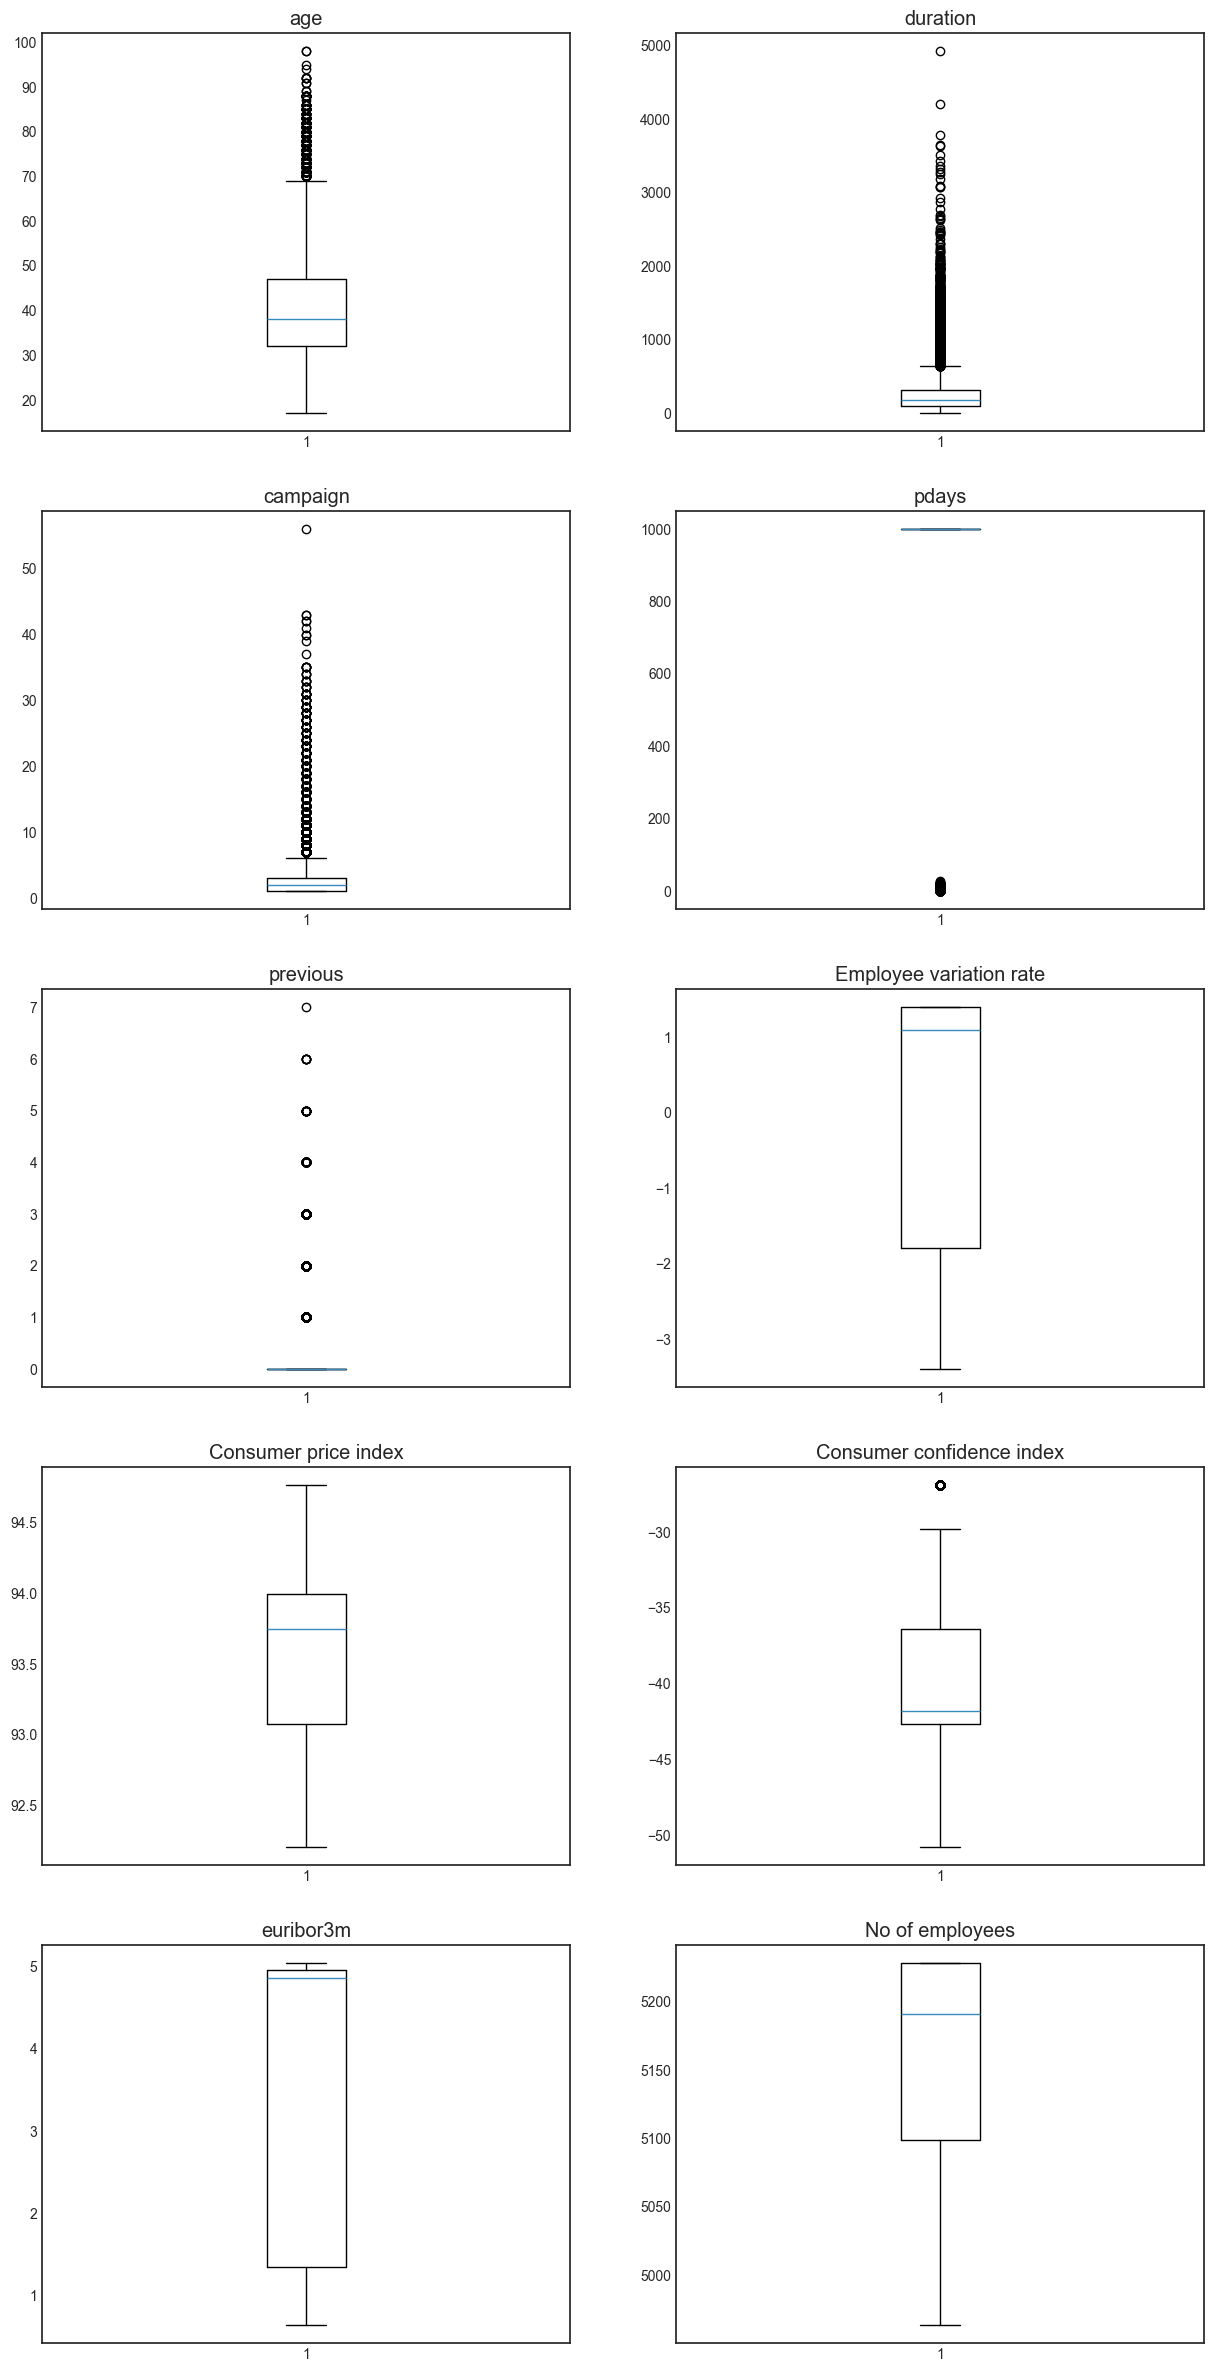

In [18]:
plt.figure(figsize = (15, 30))
plt.style.use('seaborn-v0_8-white')
ax=plt.subplot(521)
plt.boxplot(bank_copy['age'])
ax.set_title('age')
ax=plt.subplot(522)
plt.boxplot(bank_copy['duration'])
ax.set_title('duration')
ax=plt.subplot(523)
plt.boxplot(bank_copy['campaign'])
ax.set_title('campaign')
ax=plt.subplot(524)
plt.boxplot(bank_copy['pdays'])
ax.set_title('pdays')
ax=plt.subplot(525)
plt.boxplot(bank_copy['previous'])
ax.set_title('previous')
ax=plt.subplot(526)
plt.boxplot(bank_copy['emp.var.rate'])
ax.set_title('Employee variation rate')
ax=plt.subplot(527)
plt.boxplot(bank_copy['cons.price.idx'])
ax.set_title('Consumer price index')
ax=plt.subplot(528)
plt.boxplot(bank_copy['cons.conf.idx'])
ax.set_title('Consumer confidence index')
ax=plt.subplot(529)
plt.boxplot(bank_copy['euribor3m'])
ax.set_title('euribor3m')
ax=plt.subplot(5,2,10)
plt.boxplot(bank_copy['nr.employed'])
ax.set_title('No of employees')

Terlihat  bahwa banyak fitur tidak memiliki outlier yang signifikan kecuali untuk usia, durasi, dan kampanye. Jadi, mari kita perbaiki hanya fitur-fitur tersebut menggunakan metode IQR (Interquartile Range).

In [19]:
numerical_features=['age','campaign','duration']
for cols in numerical_features:
    Q1 = bank_copy[cols].quantile(0.25)
    Q3 = bank_copy[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (bank_copy[cols] >= Q1 - 1.5 * IQR) & (bank_copy[cols] <= Q3 + 1.5 *IQR)
    bank_copy=bank_copy.loc[filter]

menampilkan kembali dalam bentuk visualisasi apakah ada outlier atau tidak  

Text(0.5, 1.0, 'campaign')

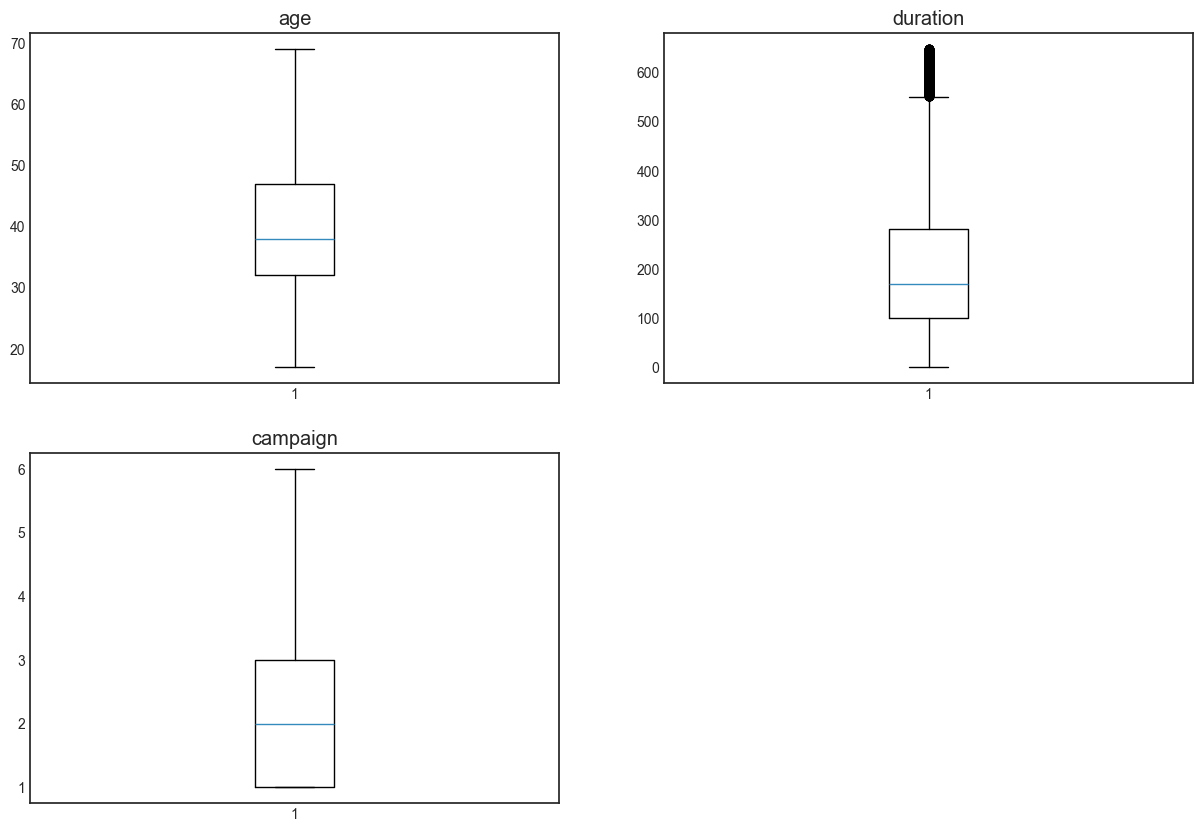

In [20]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-v0_8-white')
ax=plt.subplot(221)
plt.boxplot(bank_copy['age'])
ax.set_title('age')
ax=plt.subplot(222)
plt.boxplot(bank_copy['duration'])
ax.set_title('duration')
ax=plt.subplot(223)
plt.boxplot(bank_copy['campaign'])
ax.set_title('campaign')

## Feature Engineering 

### Education- category clubbing
mengelompokkan kategori edukasi seperti 'basic.9y','basic.6y','basic.4y' sampai 'middle school'

In [21]:
bank_features=bank_copy.copy()
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    bank_features.loc[bank_features['education'] == i, 'education'] = "middle.school"

bank_features['education'].value_counts()

education
middle.school          10688
university.degree      10559
high.school             8287
professional.course     4554
unknown                 1459
illiterate                14
Name: count, dtype: int64

### Encoding - Month and Day of week
meng Encodingkan kategori di month and day of week terhadap respective numbers

In [22]:
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
bank_features['month']= bank_features['month'].map(month_dict) 

day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
bank_features['day_of_week']= bank_features['day_of_week'].map(day_dict) 

melihat head yang sudah di enkodekan

In [23]:
bank_features.loc[:, ['month', 'day_of_week']].head()

,month,day_of_week
0,5,2
1,5,2
2,5,2
3,5,2
4,5,2


### Encoding 999 in pdays as 0

Mengekodekan angka 999 pada fitur `pdays` (yaitu klien yang belum dihubungi dalam kampanye sebelumnya) menjadi 0.

In [24]:
bank_features.loc[bank_features['pdays'] == 999, 'pdays'] = 0
bank_features['pdays'].value_counts()

pdays
0     34305
3       367
6       343
4       105
9        54
2        51
12       50
7        48
10       44
5        38
13       28
1        23
11       22
15       20
14       15
8        14
16       10
17        8
18        6
22        3
21        2
25        1
26        1
27        1
20        1
19        1
Name: count, dtype: int64

### Ordinal Number Encoding
Di sini, kita akan melakukan encoding pada fitur-fitur yang memiliki nilai "yes", "no", dan "unknown". Kita akan menetapkan: yes menjadi 1, no menjadi 0, dan unknown menjadi -1.

In [25]:
dictionary={'yes':1,'no':0,'unknown':-1}
bank_features['housing']=bank_features['housing'].map(dictionary)
bank_features['default']=bank_features['default'].map(dictionary)
bank_features['loan']=bank_features['loan'].map(dictionary)

melihat head pada data ordinal yang sudah di enkodekan

In [26]:
dictionary1={'no':0,'yes':1}
bank_features['y']=bank_features['y'].map(dictionary1)

bank_features.loc[:,['housing','default','loan','y']].head()

,housing,default,loan,y
0,0,0,0,0
1,0,-1,0,0
2,1,0,0,0
3,0,0,0,0
4,0,0,1,0


### Ordinal Encoding

melakukan one hot enkoding  untuk fitur contact dan poutcome  lalu dihapus untuk digantikan dengan hasil enkodenya 

In [27]:
dummy_contact=pd.get_dummies(bank_features['contact'], prefix='dummy',drop_first=True)
dummy_outcome=pd.get_dummies(bank_features['poutcome'], prefix='dummy',drop_first=True)
bank_features = pd.concat([bank_features,dummy_contact,dummy_outcome],axis=1)
bank_features.drop(['contact','poutcome'],axis=1, inplace=True)

melihat headnya 

In [28]:
bank_features.loc[:,['dummy_telephone','dummy_nonexistent','dummy_success']].head()

,dummy_telephone,dummy_nonexistent,dummy_success
0,True,True,False
1,True,True,False
2,True,True,False
3,True,True,False
4,True,True,False


### Frequency encoding

menggunakan frequency endcoding  dengan job  dan fitur edukasi yang di dalam dataset

In [29]:
bank_job=bank_features['job'].value_counts().to_dict()
bank_ed=bank_features['education'].value_counts().to_dict()

melakukan mapping ppada enkoding di fitur lama 

In [30]:
bank_features['job']=bank_features['job'].map(bank_job)
bank_features['education']=bank_features['education'].map(bank_ed)

menampilkan head


In [31]:
bank_features.loc[:,['job','education']].head()

,job,education
0,899,10688
1,3456,8287
2,3456,8287
3,9110,10688
4,3456,8287


### Target Guided Ordinal Encoding

Mari kita encoding fitur `marital` berdasarkan target 'y'. Pertama, mari kita cari rata-rata target berdasarkan fitur `marital`.

In [32]:
bank_features.groupby(['marital'])['y'].mean()

marital
divorced    0.063988
married     0.069050
single      0.113226
unknown     0.129032
Name: y, dtype: float64

melakukan pengelompokan pada ordinal label yang dijadikan sebagai target Y

In [33]:
ordinal_labels=bank_features.groupby(['marital'])['y'].mean().sort_values().index
ordinal_labels

Index(['divorced', 'married', 'single', 'unknown'], dtype='object', name='marital')

meminculkan hasil enkodenya

In [34]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'divorced': 0, 'married': 1, 'single': 2, 'unknown': 3}

menghitung marital ordinal 

In [35]:
bank_features['marital_ordinal']=bank_features['marital'].map(ordinal_labels2)
bank_features.drop(['marital'], axis=1,inplace=True)

bank_features.marital_ordinal.value_counts()

marital_ordinal
1    21506
2    10086
0     3907
3       62
Name: count, dtype: int64

### Standardization of numerical variables

In [36]:
bank_scale=bank_features.copy()
Categorical_variables=['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success', 'marital_ordinal']


feature_scale=[feature for feature in bank_scale.columns if feature not in Categorical_variables]


scaler=StandardScaler()
scaler.fit(bank_scale[feature_scale])

StandardScaler()

melihat data yang sudah di standarisasi 

In [37]:
scaled_data = pd.concat([bank_scale[['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success', 'marital_ordinal']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(bank_scale[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_data.head()

,job,education,default,housing,loan,month,day_of_week,y,dummy_telephone,dummy_nonexistent,dummy_success,marital_ordinal,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,899,10688,0,0,0,5,2,0,True,True,False,1,1.694643,0.383434,-0.813061,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340002
1,3456,8287,-1,0,0,5,2,0,True,True,False,1,1.797965,-0.413575,-0.813061,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340002
2,3456,8287,0,1,0,5,2,0,True,True,False,1,-0.268482,0.134369,-0.813061,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340002
3,9110,10688,0,0,0,5,2,0,True,True,False,1,0.041485,-0.399342,-0.813061,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340002
4,3456,8287,0,0,1,5,2,0,True,True,False,1,1.694643,0.710777,-0.813061,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340002


### Feature Selection

In [38]:
X=scaled_data.drop(['y'],axis=1)
y=scaled_data.y

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()


melihat fitur yang penting dan pangkas fiturnya untuk membuat model bekerja dengan baik 

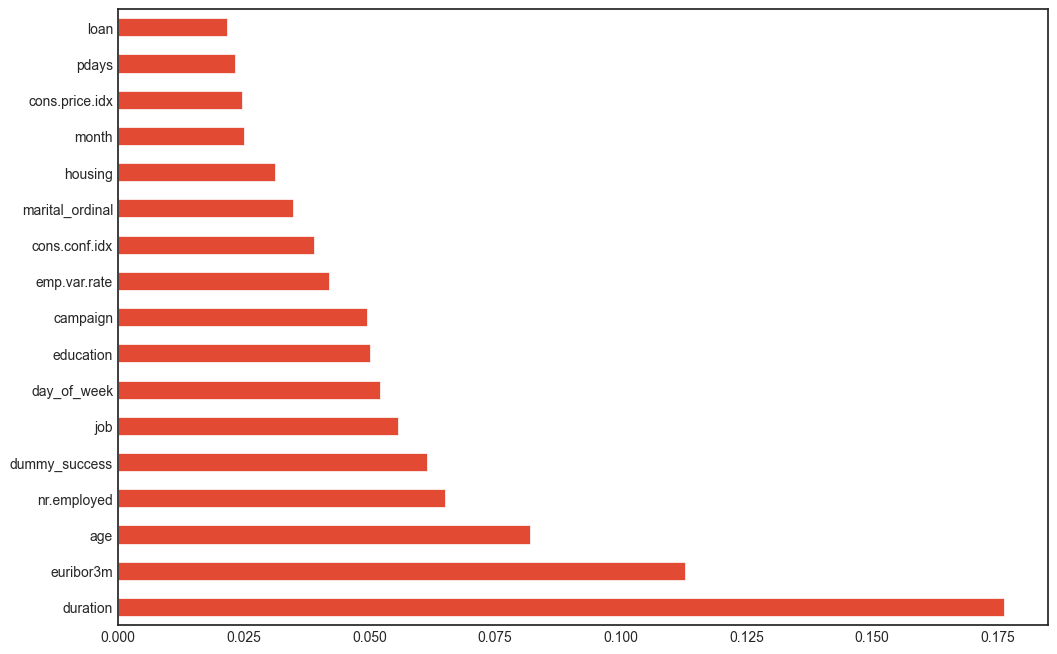

In [39]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

### Train and Test Split (80:20)

In [40]:
X=scaled_data.drop(['pdays','month','cons.price.idx','loan','housing','emp.var.rate','y'],axis=1)
y=scaled_data.y

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (28448, 15)
Input Test: (7113, 15)
Output Training: (28448,)
Output Test: (7113,)


## Modeling Data

### Model Selection

purpose: Memprediksi apakah ada deposito yang dilakukan berdasarkan nilai-nilai dari fitur-fitur tersebut. Hasilnya akan berupa 0 atau 1. Jadi, kita dapat memutuskan untuk menggunakan model klasifikasi untuk masalah ini.

In [41]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.882482599781859
Decision Tree Test Accuracy: 0.6428312903816458
KNN Test Accuracy: 0.8746929484882704
SVC Test Accuracy: 0.9188718011316903
Naive Bayes Test Accuracy: 0.8191811374646486


## Logistic Regression 

saya memilih model  regression di sini dengan  parameter tuning 

In [42]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=np.float64(0.5689866029018293), random_state=0)
The mean accuracy of the model is: 0.9263320680444257


hasil model terbaik kemudian dilatih kembali dengan data yang sudah di definisikan

In [43]:
logreg = LogisticRegression(C=0.5689866029018293, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


Melihat Confussion Matrix

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[6390  148]
 [ 376  199]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      6538
           1       0.57      0.35      0.43       575

    accuracy                           0.93      7113
   macro avg       0.76      0.66      0.70      7113
weighted avg       0.91      0.93      0.92      7113



**Wawasan:**

* Hasil Confusion Matrix menunjukkan bahwa kita memiliki **6432+106** prediksi yang benar dan **382+193** prediksi yang salah.
* Laporan klasifikasi mengungkapkan bahwa kita memiliki **94%** precision, yang berarti tingkat ketepatan model dalam tidak memberi label positif pada instance yang sebenarnya negatif. 

## Evaluation 

### ROC Curve 
melihat  hasil ROC Curve

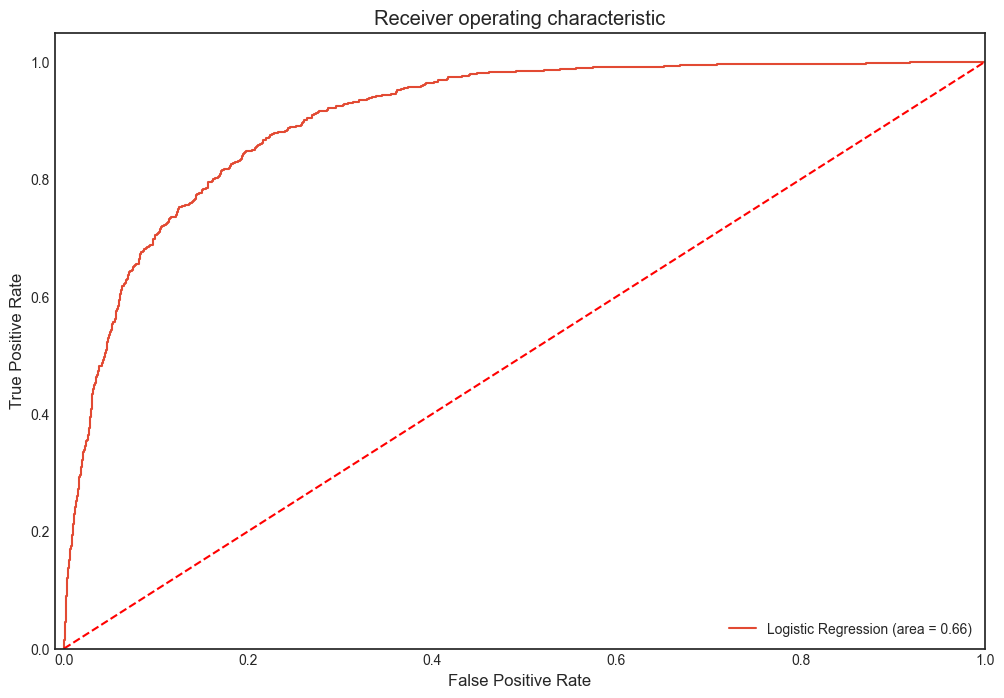

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Dari kurva ROC, kita dapat menyimpulkan bahwa model logistik kita telah mengklasifikasikan prospek yang membuat deposito dengan benar daripada memprediksi positif palsu. Semakin mendekati kurva ROC (merah) ke sisi kiri atas, semakin baik model kita. Kita dapat memilih nilai antara 0,8 hingga 0,9 sebagai nilai ambang batas yang dapat memberikan hasil positif yang benar.

## Kesimpulan

Berikut adalah beberapa rekomendasi untuk bank yang dapat membantu meningkatkan tingkat deposito:

* Klasifikasikan peran pekerjaan berdasarkan tingkat korporat dan dekati semua karyawan tingkat 1 dalam beberapa hari setelah kampanye dimulai.
* Dengarkan prospek dan kumpulkan lebih banyak informasi untuk memberikan rencana deposito terbaik, yang dapat meningkatkan durasi panggilan dan berpotensi menghasilkan deposito.
* Mendekati prospek pada awal periode bank yang baru (Mei-Juli) akan menjadi pilihan yang baik karena banyak yang menunjukkan hasil positif dari riwayat data.
* Sesuaikan kampanye sesuai dengan kondisi ekonomi nasional, jangan mengalokasikan biaya untuk kampanye saat ekonomi nasional sedang berkinerja buruk.